<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [2]:
# Write your code here

# Get data
# Write your code here


# I have pulled the data from twitter platform
# Steps:
# sign up for the twitter developer portal and create a project. 
# use API key and API secret to authenticate my self and communicate with twitter api

!pip install tweepy
import tweepy

# Twitter API keys
api_key = "kn5WGFLWqGEH1ril1TIOudfIP"
api_secret = "tn12NRKtDXqAfBhHASH2Gpki9f2NEApgc4ox604oCrnAzYw3Je"

# Authentication
authentication = tweepy.OAuthHandler(api_key, api_secret)
api = tweepy.API(authentication, wait_on_rate_limit=True)

# I have used the hash tag to pull the tweets
query = "%23blacklivesmatter"

# get tweets from the API
tweets = tweepy.Cursor(api.search,
              q=query,
              lang="en",
              since="2022-01-01").items(1000)


tweets_list = [tweet for tweet in tweets]
print("Total Tweets fetched are:", len(tweets_list))

# Store tweets in a data frame
import pandas as pd
df_tweets = pd.DataFrame()

for t in tweets_list:
    try:
        text = api.get_status(id=t.id, tweet_mode='extended').full_text
    except:
        pass
    df_tweets = df_tweets.append(pd.DataFrame({'text': text}, index=[0]))
    # tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
print(f'Shape of the data frame: {df_tweets.shape}')
df_tweets.head()



Total Tweets fetched are: 1000
Shape of the data frame: (1000, 1)


,text
0,@Tayyayswift @chartdata @MorganWallen Attentio...
0,"RT @Sciencehigh9: In this podcast, we will tal..."
0,@duaoIaa @chartdata @MorganWallen Attention 🚨⚠...
0,"In this podcast, we will talk about solutions ..."
0,@Doja4Vogue @chartdata @MorganWallen Attention...


In [9]:

df_tweets.to_csv("tweets.csv") 
tweets_text_df = df_tweets[['text']]
print(tweets_text_df.head())


                                                text
0  @Tayyayswift @chartdata @MorganWallen Attentio...
0  RT @Sciencehigh9: In this podcast, we will tal...
0  @duaoIaa @chartdata @MorganWallen Attention 🚨⚠...
0  In this podcast, we will talk about solutions ...
0  @Doja4Vogue @chartdata @MorganWallen Attention...


In [10]:
tweets_text_df

,text
0,@Tayyayswift @chartdata @MorganWallen Attentio...
0,"RT @Sciencehigh9: In this podcast, we will tal..."
0,@duaoIaa @chartdata @MorganWallen Attention 🚨⚠...
0,"In this podcast, we will talk about solutions ..."
0,@Doja4Vogue @chartdata @MorganWallen Attention...
...,...
0,RT @TheLeoTerrell: Black Lives Matter got caug...
0,"RT @tallycac: Today we remember Raheem Reeder,..."
0,RT @TheLeoTerrell: Black Lives Matter got caug...
0,RT @TheLeoTerrell: Black Lives Matter got caug...


In [11]:
import nltk
nltk.download()
nltk.download('stopwords')
# Data cleaning
#Lower Case
tweets_text_df['text_to_lower'] = tweets_text_df['text'].apply(lambda t: " ".join(w.lower() for w in t.split()))
print(tweets_text_df.head())

#Remove punctuations
tweets_text_df['text_remove_punct'] = tweets_text_df['text_to_lower'].str.replace('[^\w\s]','')
print(tweets_text_df.head())

#Remove Special Charachters
import re
tweets_text_df['text_rm_special_chars'] = tweets_text_df['text_remove_punct'].apply(lambda t: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', ch) for ch in t ))
print(tweets_text_df.head())

#Remove Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets_text_df['text_rm_stop_char'] = tweets_text_df['text_rm_special_chars'].apply(lambda t: " ".join(word for word in t.split() if word not in stop))
print(tweets_text_df.head())

#Spelling Correction
from textblob import TextBlob
tweets_text_df['text_spell_correction'] = tweets_text_df['text_rm_stop_char'].apply(lambda x: str(TextBlob(x).correct()))
print(tweets_text_df.head())

#Tokenization
import nltk
nltk.download('punkt')
tweets_text_df['text_tokenization'] = tweets_text_df['text_spell_correction'].apply(lambda text: TextBlob(text).words)
print(tweets_text_df.head())


#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
tweets_text_df['text_stemming'] = tweets_text_df['text_tokenization'].apply(lambda text: " ".join([ps.stem(word) for word in text]))
print(tweets_text_df.head())

#Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')
tweets_text_df['text_lemmatize'] = tweets_text_df['text_stemming'].apply(lambda text: " ".join([Word(word).lemmatize() for word in text.split()]))
tweets_text_df.to_csv('tweets_clean.csv',index=False)
print(tweets_text_df.head())


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

Download which package (l=list; x=cancel)?
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


                                                text  \
0  @Tayyayswift @chartdata @MorganWallen Attentio...   
0  RT @Sciencehigh9: In this podcast, we will tal...   
0  @duaoIaa @chartdata @MorganWallen Attention 🚨⚠...   
0  In this podcast, we will talk about solutions ...   
0  @Doja4Vogue @chartdata @MorganWallen Attention...   

                                       text_to_lower  \
0  @tayyayswift @chartdata @morganwallen attentio...   
0  rt @sciencehigh9: in this podcast, we will tal...   
0  @duaoiaa @chartdata @morganwallen attention 🚨⚠...   
0  in this podcast, we will talk about solutions ...   
0  @doja4vogue @chartdata @morganwallen attention...   

                                   text_remove_punct  \
0  tayyayswift chartdata morganwallen attention  ...   
0  rt sciencehigh9 in this podcast we will talk a...   
0  duaoiaa chartdata morganwallen attention  go l...   
0  in this podcast we will talk about solutions t...   
0  doja4vogue chartdata morganwallen attention

In [12]:
tweets_text_df.index = [x for x in range(1, len(tweets_text_df.values)+1)]
tweets_text_df.to_csv('tweets_clean.csv',index=False)
tweets_text_df.head()

,text,text_to_lower,text_remove_punct,text_rm_special_chars,text_rm_stop_char,text_spell_correction,text_tokenization,text_stemming,text_lemmatize
1,@Tayyayswift @chartdata @MorganWallen Attentio...,@tayyayswift @chartdata @morganwallen attentio...,tayyayswift chartdata morganwallen attention ...,tayyayswift chartdata morganwallen attention ...,tayyayswift chartdata morganwallen attention g...,tayyayswift chartdata morganwallen attention g...,"[tayyayswift, chartdata, morganwallen, attenti...",tayyayswift chartdata morganwallen attent go l...,tayyayswift chartdata morganwallen attent go l...
2,"RT @Sciencehigh9: In this podcast, we will tal...","rt @sciencehigh9: in this podcast, we will tal...",rt sciencehigh9 in this podcast we will talk a...,rt sciencehigh9 in this podcast we will talk a...,rt sciencehigh9 podcast talk solutions mental ...,it sciencehigh9 podcast talk solutions mental ...,"[it, sciencehigh9, podcast, talk, solutions, m...",it sciencehigh9 podcast talk solut mental heal...,it sciencehigh9 podcast talk solut mental heal...
3,@duaoIaa @chartdata @MorganWallen Attention 🚨⚠...,@duaoiaa @chartdata @morganwallen attention 🚨⚠...,duaoiaa chartdata morganwallen attention go l...,duaoiaa chartdata morganwallen attention go l...,duaoiaa chartdata morganwallen attention go li...,duaoiaa chartdata morganwallen attention go li...,"[duaoiaa, chartdata, morganwallen, attention, ...",duaoiaa chartdata morganwallen attent go lipai...,duaoiaa chartdata morganwallen attent go lipai...
4,"In this podcast, we will talk about solutions ...","in this podcast, we will talk about solutions ...",in this podcast we will talk about solutions t...,in this podcast we will talk about solutions t...,podcast talk solutions mental health stigma bl...,podcast talk solutions mental health stroma bl...,"[podcast, talk, solutions, mental, health, str...",podcast talk solut mental health stroma black ...,podcast talk solut mental health stroma black ...
5,@Doja4Vogue @chartdata @MorganWallen Attention...,@doja4vogue @chartdata @morganwallen attention...,doja4vogue chartdata morganwallen attention g...,doja4vogue chartdata morganwallen attention g...,doja4vogue chartdata morganwallen attention go...,doja4vogue chartdata morganwallen attention go...,"[doja4vogue, chartdata, morganwallen, attentio...",doja4vogu chartdata morganwallen attent go lip...,doja4vogu chartdata morganwallen attent go lip...


In [13]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

tokens= []
for i in tweets_text_df['text_lemmatize']:
  tokens.append(word_tokenize(i))
data_no_null = [t for t in tokens if t != []]
repeat_words = list(itertools.chain.from_iterable(data_no_null))

trigrams = nltk.trigrams(repeat_words)
FD = nltk.FreqDist(trigrams)
FD

FreqDist({('tayyayswift', 'chartdata', 'morganwallen'): 1,
          ('chartdata', 'morganwallen', 'attent'): 5,
          ('morganwallen', 'attent', 'go'): 5,
          ('attent', 'go', 'lipaisbaddi'): 5,
          ('go', 'lipaisbaddi', 'account'): 5,
          ('lipaisbaddi', 'account', 'like'): 5,
          ('account', 'like', 'all'): 5,
          ('like', 'all', 'sweet'): 5,
          ('all', 'sweet', 'get'): 5,
          ('sweet', 'get', '10000000'): 5,
          ('get', '10000000', 'million'): 5,
          ('10000000', 'million', 'dollar'): 5,
          ('million', 'dollar', 'freepromot'): 5,
          ('dollar', 'freepromot', 'dale'): 5,
          ('freepromot', 'dale', 'blacklivesmatt'): 5,
          ('dale', 'blacklivesmatt', 'lgbtqialivesmatt'): 5,
          ('blacklivesmatt', 'lgbtqialivesmatt', 'nopolitich'): 5,
          ('lgbtqialivesmatt', 'nopolitich', 'note'): 5,
          ('nopolitich', 'note', 'nose'): 5,
          ('note', 'nose', 'it'): 2,
          ('nose', 'it', 

In [14]:
from collections import Counter
bg = nltk.bigrams(repeat_words)
FD = nltk.FreqDist(bg)
bg_dict = dict(FD)
for i in bg_dict:
  print( str(i) + ':' + str(bg_dict[i] / repeat_words.count(i[0])))

Streaming output truncated to the last 5000 lines.
('say', 'name'):0.35294117647058826
('name', 'rayshard'):0.07142857142857142
('rayshard', 'brook'):1.0
('brook', 'blacklivesmatt'):1.0
('blacklivesmatt', 'it'):0.06372549019607843
('it', 'eslemanabayi'):0.013550135501355014
('eslemanabayi', 'join'):1.0
('join', 'matinyarar'):0.6486486486486487
('matinyarar', 'call'):1.0
('call', 'breakthesil'):0.5
('breakthesil', 'end'):0.5
('end', 'illeg'):0.6428571428571429
('illeg', 'u'):0.7575757575757576
('u', 'sanction'):0.38461538461538464
('sanction', 'peopl'):0.1487603305785124
('peopl', 'zimbabw'):0.12658227848101267
('zimbabw', 'of'):0.625
('of', 'it'):0.36363636363636365
('justicefor', 'right'):0.023809523809523808
('right', 'choos'):0.06666666666666667
('choos', 'belong'):0.3333333333333333
('belong', 'selfempower'):1.0
('selfempower', 'selflov'):1.0
('selflov', 'selfbelief'):1.0
('selfbelief', 'ulm'):1.0
('ulm', 'black'):0.024390243902439025
('black', 'welfar'):0.004484304932735426
('welf

In [16]:
nltk.download('brown')
total_data = ''
j= []
count = 1
for i in tweets_text_df['text_lemmatize']:
  total_data += i
  k = 'Tweet-' + str(i)
  j.append(k)
  count+= 1

from textblob import TextBlob

np = []
frqncy = []
for i in tweets_text_df['text_lemmatize']:
  blob = TextBlob(i)
  for nouns in blob.noun_phrases:
    np.append(nouns)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [17]:
for w in np:
  npf = []
  for i in tweets_text_df['text_lemmatize']:
    npf.append(i.count(w) / total_data.count(w))
  frqncy.append(np)

noun_phrases_Data = pd.DataFrame(frqncy).T
noun_phrases_Data.columns = list(np)
noun_phrases_Data.j = j
noun_phrases_Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


,tayyayswift chartdata morganwallen attent,lipaisbaddi account,dollar freepromot dale blacklivesmatt lgbtqialivesmatt nopolitich note nose,sciencehigh9 podcast talk solut,mental health stroma,black commun tune httpstco8fg57,duaoiaa chartdata morganwallen attent,lipaisbaddi account,dollar freepromot dale blacklivesmatt lgbtqialivesmatt nopolitich note nose,podcast talk solut,...,rememb redeem,short tallahasse polic depart killer cop,year april,expens home claim racism blacklivesmatt racism organ,expens home claim racism blacklivesmatt racism organ,blacklivesmatt blacktwitt,white florida highway patrolman sexual attack,black child patrol car,black mimi twentieth centuri audiobook narrat dr,dung amazon httpstcodonsxsvckj
0,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,...,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent,tayyayswift chartdata morganwallen attent
1,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,...,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account,lipaisbaddi account
2,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...,dollar freepromot dale blacklivesmatt lgbtqial...
3,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,...,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut,sciencehigh9 podcast talk solut
4,mental health stroma,mental health stroma,mental health stroma,mental health stroma,mental health stroma,mental health stroma,mental health stroma,mental health stroma,mental health stroma,mental health stroma,...,mental health stroma,mental health stroma,mental health stroma,mental health stroma,mental health stroma,mental health stroma,mental health stroma,menta

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [21]:
# Write your code here
import math
sents = tweets_text_df["text_spell_correction"].values.tolist()
# Remove duplicate words
word_list = set([w for s in sents for w in s.split(" ")])
tf_df = pd.DataFrame(word_list, columns=["words"])
count=1

# Calculate tf vs idf

def get_tf_vs_idf(x,sent):
  value = sent.count(x)
  size = len(sent.split(" "))
  if(value != 0):
    return (value/size)*(math.log(size/value, 10))
  else:
    return 0
    
for sent in sents:
  tf_df["Tweet"+str(count)] = tf_df["words"].apply(lambda x: get_tf_vs_idf(x,sent))
  count=count+1

tf_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,words,Tweet1,Tweet2,Tweet3,Tweet4,Tweet5,Tweet6,Tweet7,Tweet8,Tweet9,...,Tweet991,Tweet992,Tweet993,Tweet994,Tweet995,Tweet996,Tweet997,Tweet998,Tweet999,Tweet1000
0,zealand,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,new,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,data,0.062963,0.0,0.062963,0.0,0.062963,0.062963,0.065051,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,communities,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chose,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,americasfrontlinedoctors,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2866,tortured,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2867,god,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2868,selfcaresunday,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_word = stopwords.words('english')

find_sent="we will talk about solutions to mental health stigma in the black community"
search_token = word_tokenize(find_sent)
search_no_stop_token = {i for i in search_token if not i in stop_word}


def cosine_vector(search_no_stop_token, text_token_no_stop_words):
  r_vector = search_no_stop_token.union(text_token_no_stop_words)
  list1 =[]
  list2 =[]
  for j in r_vector: 
      if j in search_no_stop_token: list1.append(1)
      else: list1.append(0) 
      if j in text_token_no_stop_words: list2.append(1) 
      else: list2.append(0)
  return r_vector, list1, list2


def cosine_sim(r_vector, l1, l2):
  count = 0
  for i in range(len(r_vector)): 
        count+= list1[i]*list2[i] 
  c = count / float((sum(list1)*sum(list2))**0.5) 
  return c


sim_score = []

for text in tweets_text_df["text_spell_correction"]:
  text_token = word_tokenize(text)
  text_token_no_stop_words = {k for k in text_token if not k in stop_word}
  r_vector, list1, list2 = cosine_vector(search_no_stop_token, text_token_no_stop_words)
  try:
    similarity = cosine_sim(r_vector, list1, list2)
  except ZeroDivisionError:
    similarity = 'None'
  sim_score.append(similarity)

sim_score_df = pd.DataFrame(list(zip(tweets_text_df['text'], sim_score)), columns=['text','cosine_similarity'])
sim_score_df

,text,cosine_similarity
0,@Tayyayswift @chartdata @MorganWallen Attentio...,0.000000
1,"RT @Sciencehigh9: In this podcast, we will tal...",0.683763
2,@duaoIaa @chartdata @MorganWallen Attention 🚨⚠...,0.000000
3,"In this podcast, we will talk about solutions ...",0.534522
4,@Doja4Vogue @chartdata @MorganWallen Attention...,0.000000
...,...,...
995,RT @TheLeoTerrell: Black Lives Matter got caug...,0.104828
996,"RT @tallycac: Today we remember Raheem Reeder,...",0.000000
997,RT @TheLeoTerrell: Black Lives Matter got caug...,0.104828
998,RT @TheLeoTerrell: Black Lives Matter got caug...,0.104828


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [46]:
# Write your code here
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [50]:
# define training data

token_list = []
for k in tweets_text_df.index:
    token_list.append(tweets_text_df["text_tokenization"][k][:])
token_list

[WordList(['tayyayswift', 'chartdata', 'morganwallen', 'attention', 'go', 'lipaisbaddie', 'account', 'liked', 'all', 'sweets', 'get', '10000000', 'million', 'dollars', 'freepromotion', 'dale', 'blacklivesmatter', 'lgbtqialivesmatter', 'nopolitich', 'note', 'nose']),
 WordList(['it', 'sciencehigh9', 'podcast', 'talk', 'solutions', 'mental', 'health', 'stroma', 'black', 'community', 'tune', 'httpstco8fg57']),
 WordList(['duaoiaa', 'chartdata', 'morganwallen', 'attention', 'go', 'lipaisbaddie', 'account', 'liked', 'all', 'sweets', 'get', '10000000', 'million', 'dollars', 'freepromotion', 'dale', 'blacklivesmatter', 'lgbtqialivesmatter', 'nopolitich', 'note', 'nose']),
 WordList(['podcast', 'talk', 'solutions', 'mental', 'health', 'stroma', 'black', 'community', 'tune', 'httpstco8fg57mwy0k', 'mentalhealthmatters', 'blacklivesmatter', 'mentalhealth', 'health', 'donation', 'supportsmallstreamers', 'supportsmallstreams', 'podernfamily', 'podcast', 'supportlocal']),
 WordList(['doja4vogue', 'c

In [55]:
model_word = Word2Vec(token_list, vector_size = 300)
print(model_word)

Word2Vec(vocab=596, vector_size=300, alpha=0.025)


In [57]:
words_list2 = list(model_word.wv.index_to_key)
words_list2

['it',
 'blacklivesmatter',
 'racism',
 'black',
 'lives',
 'matter',
 'sanction',
 'got',
 'caught',
 'buying',
 'homes',
 'expensive',
 'organs',
 'claiming',
 'theleoterrell',
 'nuts',
 'king',
 'can',
 'go',
 'anti',
 'pots',
 'foxes',
 'nose',
 'scouts',
 'un',
 'like',
 'duc',
 'pontifex',
 'copelandnetwork',
 'naso',
 'was',
 'people',
 'us',
 'nothing',
 'man',
 'stop',
 'cop',
 'shit',
 'take',
 'record',
 'pocgamer',
 'amp',
 'talking',
 'lose',
 'followers',
 'trash',
 'white',
 'friend',
 'veedusm',
 'heard',
 'year',
 'police',
 'papa',
 'bee',
 'dressed',
 'amber',
 'ram',
 'photo',
 'crisis',
 'instagram',
 'justicefor',
 'ethiopia',
 'ulm',
 'system',
 'global',
 'join',
 'old',
 'creating',
 'get',
 'support',
 'financial',
 'hindrance',
 'ethiopian',
 'hr6600',
 'proposed',
 'cuts',
 'breakthesilence',
 'world',
 'need',
 'illegal',
 'loyal',
 'back',
 'cong',
 'democratic',
 'hellohe59251817',
 'republic',
 'life',
 'free',
 'calling',
 'end',
 'patrick',
 'head',
 '

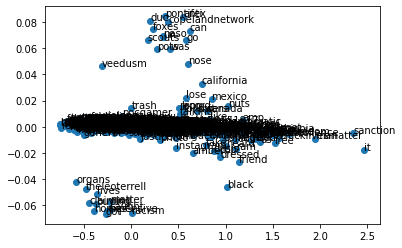

In [62]:
# define training data
# fit a 2d PCA model to the vectors
from sklearn.decomposition import PCA

X = model_word.wv[model_word.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)


# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_word.wv.index_to_key)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [33]:
list_values = tweets_text_df["text_spell_correction"].values.tolist()
tweets_text_sen2_df = pd.DataFrame(list_values, columns=["clean_text"])
tweets_text_sen2_df.index.name = 'document_id';
tweets_text_sen2_df

,clean_text
document_id,
0,tayyayswift chartdata morganwallen attention g...
1,it sciencehigh9 podcast talk solutions mental ...
2,duaoiaa chartdata morganwallen attention go li...
3,podcast talk solutions mental health stroma bl...
4,doja4vogue chartdata morganwallen attention go...
...,...
995,it theleoterrell black lives matter got caught...
996,it tallycac today remember redeem render whose...
997,it theleoterrell black lives matter got caught...


In [37]:
# The GitHub link of your final csv file

https://github.com/vish063/INFO-5731/blob/main/tweets_sentiment.csv

# Link: 